In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl

In [2]:
#User temperature possible inputs from 22 to 30 with one difference:
ut = ctrl.Antecedent(np.arange(22, 31, 1), 'UT')
#User temperature membership functions:
ut['low'] = fuzzy.trimf(ut.universe,[-100,22,25])
ut['optimal'] = fuzzy.trimf(ut.universe,[22,25,28])
ut['high'] = fuzzy.trapmf(ut.universe,[25,28,30,100])

In [3]:
#Temperature difference possible inputs from -1 to 3 with 0.1 difference:
tDif = ctrl.Antecedent(np.arange(-1, 3.1, 0.1), 'TDif')
#Temperature difference membership functions:
tDif['negative'] = fuzzy.trapmf(tDif.universe,[-5,-1,-0.9,0])
tDif['zero'] = fuzzy.trimf(tDif.universe,[-0.5,0,0.5])
tDif['positive'] = fuzzy.trimf(tDif.universe,[0,1,2])
tDif['large'] = fuzzy.trapmf(tDif.universe,[1,2,3,5])

In [4]:
#Dew Point possible inputs from 10 to 18 with one difference:
td = ctrl.Antecedent(np.arange(10, 18, 1), 'Td')
#User temperature membership functions:
td['optimal'] = fuzzy.trapmf(td.universe,[0,10,11,14])
td['humid'] = fuzzy.trapmf(td.universe,[12,15,18,28])

In [5]:
#Electric Volt possible inputs from 130 to 220 with 10 difference:
ev = ctrl.Antecedent(np.arange(130, 230, 10), 'EV')
#Electric Volt membership functions:
ev['low'] = fuzzy.trapmf(ev.universe,[100,130,160,180])
ev['regular'] = fuzzy.trapmf(ev.universe,[170,190,220,250])


In [6]:
#Compressor Speed  possible outputs from 0 to 100 with 10 difference:
sc = ctrl.Consequent(np.arange(0, 110, 10), 'SC')
#Compressor Speed membership functions:
sc['low'] = fuzzy.trapmf(sc.universe,[-10,0,30,50])
sc['medium'] = fuzzy.trimf(sc.universe,[40,60,80])
sc['fast'] = fuzzy.trapmf(sc.universe,[70,90,100,110])

In [7]:
#Fan Speed  possible outputs from 0 to 100 with 10 difference:
fc = ctrl.Consequent(np.arange(0, 110, 10), 'FC')
#Fan Speed membership functions:
fc['low'] = fuzzy.trapmf(fc.universe,[-10,0,30,50])
fc['medium'] = fuzzy.trimf(fc.universe,[40,60,80])
fc['fast'] = fuzzy.trapmf(fc.universe,[70,90,100,110])

In [8]:
#Mode of operation possible outputs from 0 to 1 with 0.1 difference:
mo = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'Mo')
#Electric Volt membership functions:
mo['AC'] = fuzzy.trimf(mo.universe,[0,0,1])
mo['DE'] = fuzzy.trimf(mo.universe,[0,1,1])

In [9]:
# Fin direction possible outputs from 25 to 75 with 5 difference:
fn = ctrl.Consequent(np.arange(25, 80, 5), 'Fn')
#Fin direction  membership functions:
fn['away'] = fuzzy.trimf(fn.universe,[0,25,75])
fn['towards'] = fuzzy.trimf(fn.universe,[25,75,100])

In [10]:
#fuzzy rule base
rule1 = ctrl.Rule(
    (ut['low'] & tDif ['negative']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))  
rule2 = ctrl.Rule(
    (ut['optimal'] & tDif ['negative']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule3 = ctrl.Rule(
    (ut['high'] & tDif ['negative']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule4 = ctrl.Rule(
    (ut['low'] & tDif ['zero']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule5 = ctrl.Rule(
    (ut['optimal'] & tDif ['zero']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule6 = ctrl.Rule(
    (ut['high'] & tDif ['zero']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule7 = ctrl.Rule(
    (ut['low'] & tDif ['positive']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule8 = ctrl.Rule(
    (ut['optimal'] & tDif ['positive']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule9 = ctrl.Rule(
    (ut['high'] & tDif ['positive']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule10 = ctrl.Rule(
    (ut['low'] & tDif ['large']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule11 = ctrl.Rule(
    (ut['optimal'] & tDif ['large']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule12 = ctrl.Rule(
    (ut['high'] & tDif ['large']) & td['optimal'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule13 = ctrl.Rule(
    (ut['low'] & tDif ['negative']) & td['optimal'] & ev['regular'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule14 = ctrl.Rule(
    (ut['optimal'] & tDif ['zero']) & td['optimal'] & ev['regular'], (sc['low'], fc['low'], mo['AC'], fn['away']))  
rule15 = ctrl.Rule(
    (ut['high'] & tDif ['negative']) & td['optimal'] & ev['regular'], (sc['low'], fc['low'], mo['AC'], fn['away'])) 
rule16 = ctrl.Rule(
    (ut['low'] & tDif ['zero']) & td['optimal'] & ev['regular'], (sc['low'], fc['fast'], mo['AC'], fn['towards'])) 
rule17 = ctrl.Rule(
    (ut['optimal'] & tDif ['zero']) & td['optimal'] & ev['regular'], (sc['low'], fc['medium'], mo['AC'], fn['towards']))
rule18 = ctrl.Rule(
    (ut['high'] & tDif ['zero']) & td['optimal'] & ev['regular'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule19 = ctrl.Rule(
    (ut['low'] & tDif ['positive']) & td['optimal'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule20 = ctrl.Rule(
    (ut['optimal'] & tDif ['positive']) & td['optimal'] & ev['regular'], (sc['medium'], fc['medium'], mo['AC'], fn['towards']))
rule21 = ctrl.Rule(
    (ut['high'] & tDif ['positive']) & td['optimal'] & ev['regular'], (sc['medium'], fc['medium'], mo['AC'], fn['towards']))
rule22 = ctrl.Rule(
    (ut['low'] & tDif ['large']) & td['optimal'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule23 = ctrl.Rule(
    (ut['optimal'] & tDif ['large']) & td['optimal'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule24 = ctrl.Rule(
    (ut['high'] & tDif ['large']) & td['optimal'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule25 = ctrl.Rule(
    (ut['low'] & tDif ['negative']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule26 = ctrl.Rule(
    (ut['optimal'] & tDif ['negative']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule27 = ctrl.Rule(
    (ut['high'] & tDif ['negative']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule28 = ctrl.Rule(
    (ut['low'] & tDif ['zero']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule29 = ctrl.Rule(
    (ut['optimal'] & tDif ['zero']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule30 = ctrl.Rule(
    (ut['high'] & tDif ['zero']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule31 = ctrl.Rule(
    (ut['low'] & tDif ['positive']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule32 = ctrl.Rule(
    (ut['optimal'] & tDif ['positive']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule33 = ctrl.Rule(
    (ut['high'] & tDif ['positive']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule34 = ctrl.Rule(
    (ut['low'] & tDif ['large']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule35 = ctrl.Rule(
    (ut['optimal'] & tDif ['large']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule36 = ctrl.Rule(
    (ut['high'] & tDif ['large']) & td['humid'] & ev['low'], (sc['low'], fc['low'], mo['AC'], fn['away']))
rule37 = ctrl.Rule(
    (ut['low'] & tDif ['negative']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['DE'], fn['towards']))
rule38 = ctrl.Rule(
    (ut['optimal'] & tDif ['negative']) & td['humid'] & ev['regular'], (sc['low'], fc['low'], mo['DE'], fn['away']))
rule39 = ctrl.Rule(
    (ut['high'] & tDif ['negative']) & td['humid'] & ev['regular'], (sc['low'], fc['low'], mo['DE'], fn['away']))
rule40 = ctrl.Rule(
    (ut['low'] & tDif ['zero']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['DE'], fn['towards']))
rule41 = ctrl.Rule(
    (ut['optimal'] & tDif ['zero']) & td['humid'] & ev['regular'], (sc['medium'], fc['fast'], mo['DE'], fn['towards']))
rule42 = ctrl.Rule(
    (ut['high'] & tDif ['zero']) & td['humid'] & ev['regular'], (sc['medium'], fc['medium'], mo['DE'], fn['towards']))
rule43 = ctrl.Rule(
    (ut['low'] & tDif ['positive']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule44 = ctrl.Rule(
    (ut['optimal'] & tDif ['positive']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule45 = ctrl.Rule(
    (ut['high'] & tDif ['positive']) & td['humid'] & ev['regular'], (sc['medium'], fc['fast'], mo['AC'], fn['towards']))
rule46 = ctrl.Rule(
    (ut['low'] & tDif ['large']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule47 = ctrl.Rule(
    (ut['optimal'] & tDif ['large']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
rule48 = ctrl.Rule(
    (ut['high'] & tDif ['large']) & td['humid'] & ev['regular'], (sc['fast'], fc['fast'], mo['AC'], fn['towards']))
 

In [11]:
# Control System Creation and Simulation
cmd_ctrl = ctrl.ControlSystem([rule1, rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10, rule11, rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21, rule22,rule23,rule24,rule25,rule26,rule27,rule28,rule29,rule30, rule31, rule32,rule33,rule34,rule35,rule36,rule37,rule38,rule39,rule40, rule41, rule42,rule43,rule44,rule45,rule46,rule47,rule48 ])
cmd_output = ctrl.ControlSystemSimulation(cmd_ctrl)



In [12]:
cmd_output.input['UT'] = 25
cmd_output.input['TDif'] = -0.5
cmd_output.input['EV'] = 150
cmd_output.input['Td'] = 15

cmd_output.compute()

C:\Users\Mustafa\miniconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


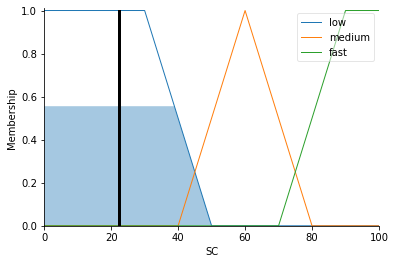

In [13]:
sc.view(sim=cmd_output)